In [ ]:
'''
Primary Objective:

Analyze the spread, trends, and patterns of COVID-19 cases in the U.S.
Identify correlations between public health policies and infection rates.
Possible Deliverables:

Time-series analysis of case trends (daily, weekly, monthly).
Geographical spread visualizations (state-wise heatmaps).
Correlations between key metrics (e.g., vaccination rates vs. cases).
Insights on the effectiveness of interventions (lockdowns, mask mandates).

'''

In [247]:
# Initializing the Random Forest model with specific parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Training the model using the training data
rf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf.predict(X_test)

# Calculating evaluation metrics for the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

In [ ]:
# Specify your project ID
project_id = "covid19-data-analytics-project"
dataset_id = "covid19_usa_2020_2023"
table_id = "covid19_usa_2020_2023"

# Initialize BigQuery client with the project ID
client = bigquery.Client(project=project_id)

# Full table path
table_path = f"{project_id}.{dataset_id}.{table_id}"

table = client.get_table(table_path)

# Print all column names
print("Columns in the table:")
for schema_field in table.schema:
    print(schema_field.name)

In [4]:
query = """
SELECT
    date,
    location_key,
    subregion1_code,
    subregion1_name,
    country_name,
    population,
    new_confirmed,
    new_deceased,
    new_persons_fully_vaccinated
FROM `covid19-data-analytics-project.covid19_usa_2020_2023.covid19_usa_2020_2023`
WHERE country_name = 'United States of America';
"""

# Execute query and load into Pandas DataFrame
df = client.query(query).to_dataframe()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255435 entries, 0 to 3255434
Data columns (total 9 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   date                          dbdate
 1   location_key                  object
 2   subregion1_code               object
 3   subregion1_name               object
 4   country_name                  object
 5   population                    Int64 
 6   new_confirmed                 Int64 
 7   new_deceased                  Int64 
 8   new_persons_fully_vaccinated  Int64 
dtypes: Int64(4), dbdate(1), object(4)
memory usage: 236.0+ MB


In [6]:
df.head(10)

,date,location_key,subregion1_code,subregion1_name,country_name,population,new_confirmed,new_deceased,new_persons_fully_vaccinated
0,2020-05-03,US,None,None,United States of America,331002647,24824,1189,<NA>
1,2020-05-03,US_AZ,AZ,Arizona,United States of America,7151502,276,14,<NA>
2,2020-05-03,US_AZ_04001,AZ,Arizona,United States of America,71545,19,0,<NA>
3,2020-05-03,US_AZ_04003,AZ,Arizona,United States of America,124864,0,0,<NA>
4,2020-05-03,US_AZ_04007,AZ,Arizona,United States of America,53578,0,0,<NA>
5,2020-05-03,US_AZ_04017,AZ,Arizona,United States of America,109079,11,0,<NA>
6,2020-05-03,US_AZ_04021,AZ,Arizona,United States of America,431564,21,0,<NA>
7,2020-05-03,US_AZ_04025,AZ,Arizona,United States of America,228082,2,0,<NA>
8,2020-05-03,US_AZ_04027,AZ,Arizona,United States of America,209507,9,0,<NA>
9,2020-05-03,US_CT,CT,Connecticut,United States of America,3605944,523,97,<NA>


In [ ]:
# Checking for missing values in each column to assess data completeness
df.isnull().sum()

In [ ]:
# Checking for missing values in each column to assess data completeness
df.isnull().sum()

In [10]:
# Checking for missing values in each column to assess data completeness
df.isnull().sum()

Missing values after filling:
0


In [11]:
# Grouping data by location_key and checking for inconsistencies in population values
population_check = df.groupby('location_key')['population'].nunique()

# Identifying any location_key with more than one unique population value
print(population_check[population_check > 1])

New lag columns added:
['new_confirmed_lag_10', 'new_deceased_lag_10', 'new_confirmed_lag_11', 'new_deceased_lag_11', 'new_confirmed_lag_12', 'new_deceased_lag_12', 'new_confirmed_lag_13', 'new_deceased_lag_13', 'new_confirmed_lag_14', 'new_deceased_lag_14']


In [12]:
# Grouping data by location_key and checking for inconsistencies in population values
population_check = df.groupby('location_key')['population'].nunique()

# Identifying any location_key with more than one unique population value
print(population_check[population_check > 1])

In [13]:
# Grouping data by location_key and checking for inconsistencies in population values
population_check = df.groupby('location_key')['population'].nunique()

# Identifying any location_key with more than one unique population value
print(population_check[population_check > 1])

In [14]:
# Normalize metrics by population (per 100,000 people)
df['new_confirmed_per_100k'] = (df['new_confirmed'] / df['population']) * 100000
df['new_deceased_per_100k'] = (df['new_deceased'] / df['population']) * 100000


In [15]:
# Calculate vaccination percentage
df['percent_fully_vaccinated'] = (df['new_persons_fully_vaccinated'] / df['population']) * 100

In [159]:
df.columns

Index(['date', 'location_key', 'subregion1_code', 'subregion1_name',
       'country_name', 'population', 'new_confirmed', 'new_deceased',
       'new_persons_fully_vaccinated', 'new_confirmed_lag_10',
       'new_deceased_lag_10', 'new_confirmed_lag_11', 'new_deceased_lag_11',
       'new_confirmed_lag_12', 'new_deceased_lag_12', 'new_confirmed_lag_13',
       'new_deceased_lag_13', 'new_confirmed_lag_14', 'new_deceased_lag_14',
       'new_confirmed_10_14_avg', 'new_deceased_10_14_avg',
       'new_confirmed_10_14_sum', 'new_deceased_10_14_sum',
       'new_confirmed_per_100k', 'new_deceased_per_100k',
       'percent_fully_vaccinated'],
      dtype='object')

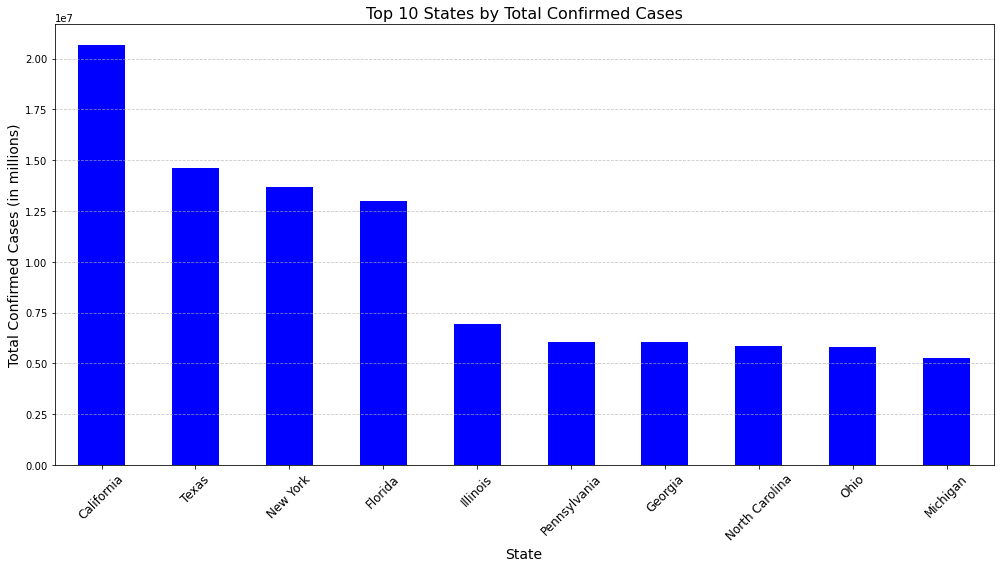

In [66]:
# Grouping data by location_key and checking for inconsistencies in population values
population_check = df.groupby('location_key')['population'].nunique()

# Identifying any location_key with more than one unique population value
print(population_check[population_check > 1])

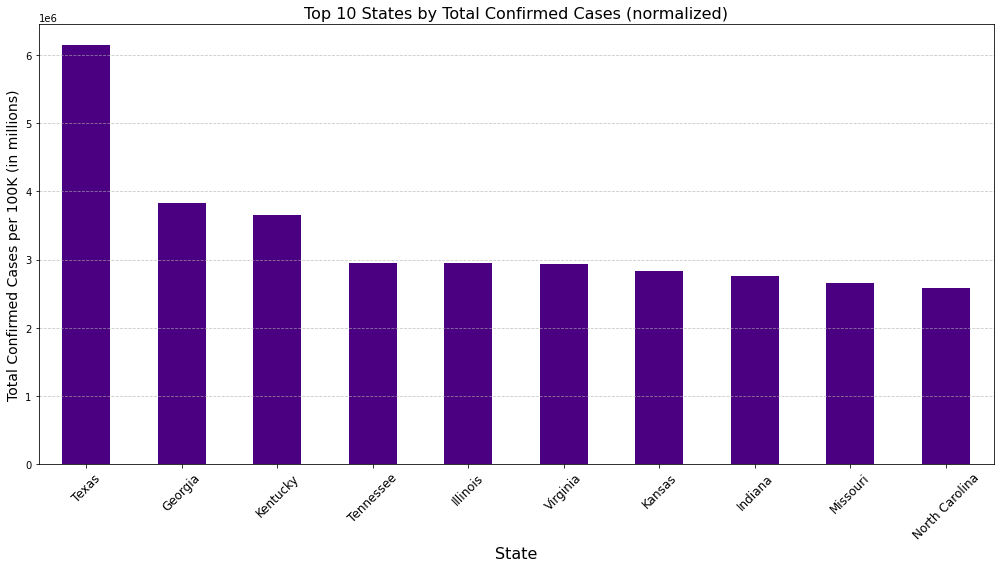

In [158]:
# Grouping data by location_key and checking for inconsistencies in population values
population_check = df.groupby('location_key')['population'].nunique()

# Identifying any location_key with more than one unique population value
print(population_check[population_check > 1])

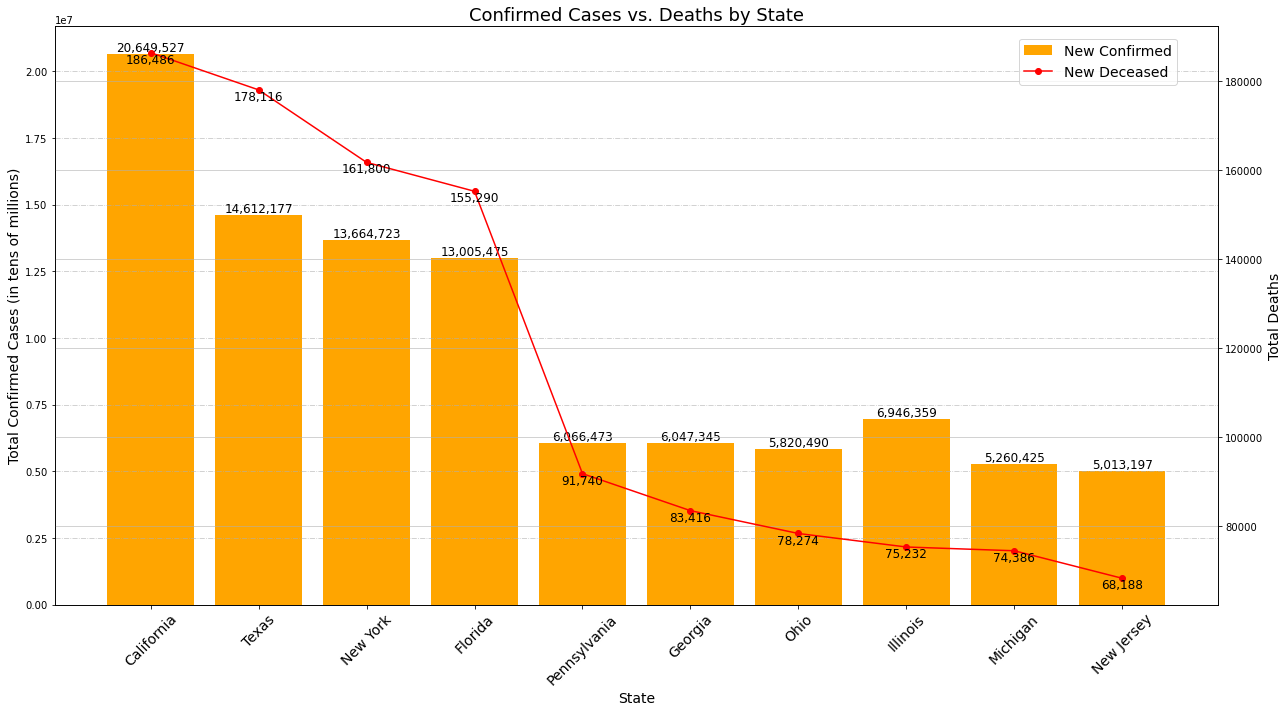

In [229]:
# Grouping data by location_key and checking for inconsistencies in population values
population_check = df.groupby('location_key')['population'].nunique()

# Identifying any location_key with more than one unique population value
print(population_check[population_check > 1])

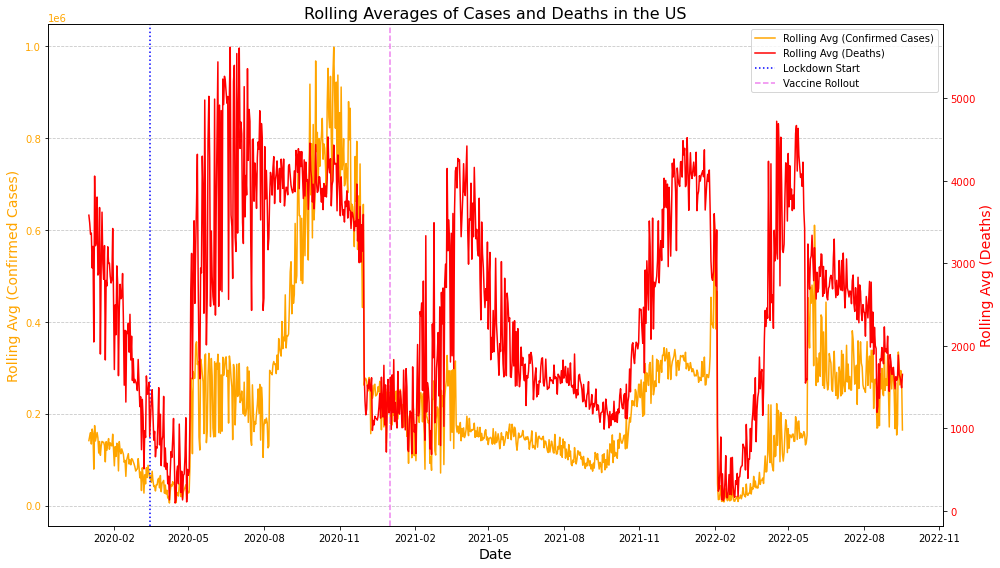

In [208]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Define significant events
lockdown_start = datetime.strptime('2020-03-15', '%Y-%m-%d')
vaccine_rollout = datetime.strptime('2021-01-01', '%Y-%m-%d')

# Create figure and primary Y-axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot rolling averages for confirmed cases
line1, = ax1.plot(dates, confirmed_avg, label='Rolling Avg (Confirmed Cases)', color='orange')
ax1.set_ylabel('Rolling Avg (Confirmed Cases)', fontsize=14, color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xlabel('Date', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary Y-axis
ax2 = ax1.twinx()
line2, = ax2.plot(dates, deceased_avg, label='Rolling Avg (Deaths)', color='red')
ax2.set_ylabel('Rolling Avg (Deaths)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add vertical lines for significant events
line3 = ax1.axvline(lockdown_start, color='blue', linestyle=':', label='Lockdown Start')
line4 = ax1.axvline(vaccine_rollout, color='violet', linestyle='--', label='Vaccine Rollout')

# Format x-axis dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Combine all handles for the legend
handles = [line1, line2, line3, line4]
labels = ['Rolling Avg (Confirmed Cases)', 'Rolling Avg (Deaths)', 'Lockdown Start', 'Vaccine Rollout']
ax1.legend(handles=handles, labels=labels, loc='upper right', fontsize=10)

# Add title
plt.title('Rolling Averages of Cases and Deaths in the US', fontsize=16)
fig.tight_layout()
plt.show()


In [272]:
# Filter for required columns
features = [ 
    'new_confirmed_10_14_avg', 'new_confirmed_10_14_sum',
    'new_confirmed_per_100k'
]

target = 'new_confirmed'

# Extract features and target
X = df[features]
y = df[target]

# Perform 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Confirm the shapes
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)


Train features shape: (2278804, 3)
Train target shape: (2278804,)
Test features shape: (976631, 3)
Test target shape: (976631,)


In [273]:
# Ensure all feature columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

# Check for non-numeric columns (should return empty if all are numeric)
print("Non-numeric columns in X_train:", X_train.select_dtypes(exclude=['number']).columns)
print("Non-numeric columns in X_test:", X_test.select_dtypes(exclude=['number']).columns)
print("Non-numeric columns in y_train:", y_train.dtype)
print("Non-numeric columns in y_test:", y_test.dtype)

Non-numeric columns in X_train: Index([], dtype='object')
Non-numeric columns in X_test: Index([], dtype='object')
Non-numeric columns in y_train: float64
Non-numeric columns in y_test: float64


In [274]:
# Filling missing values in specified columns with 0 to handle missing data
df['new_persons_fully_vaccinated'] = df['new_persons_fully_vaccinated'].fillna(0)

In [275]:
# Explicitly convert all features to float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Convert target variables to float64
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Confirm data types
print("X_train dtypes after conversion:")
print(X_train.dtypes)

print("\nX_test dtypes after conversion:")
print(X_test.dtypes)

print("y_train dtype:", y_train.dtypes)
print("y_test dtype:", y_test.dtypes)


X_train dtypes after conversion:
new_confirmed_10_14_avg    float64
new_confirmed_10_14_sum    float64
new_confirmed_per_100k     float64
dtype: object

X_test dtypes after conversion:
new_confirmed_10_14_avg    float64
new_confirmed_10_14_sum    float64
new_confirmed_per_100k     float64
dtype: object
y_train dtype: float64
y_test dtype: float64


In [276]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [277]:
# Initializing the Random Forest model with specific parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Training the model using the training data
rf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf.predict(X_test)

# Calculating evaluation metrics for the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Model Performance:
Mean Absolute Error (MAE): 41.93420708114779
Root Mean Squared Error (RMSE): 466.62067820762144
R-squared (R²): 0.47600071241732533


In [278]:
# Extracting and displaying the importance of each feature in the model
feature_importances = rf.feature_importances_
features = ['new_confirmed_10_14_avg', 'new_confirmed_10_14_sum', 'new_confirmed_per_100k']

for feature, importance in zip(features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: new_confirmed_10_14_avg, Importance: 0.19995070412475996
Feature: new_confirmed_10_14_sum, Importance: 0.19065514083118268
Feature: new_confirmed_per_100k, Importance: 0.6093941550440574


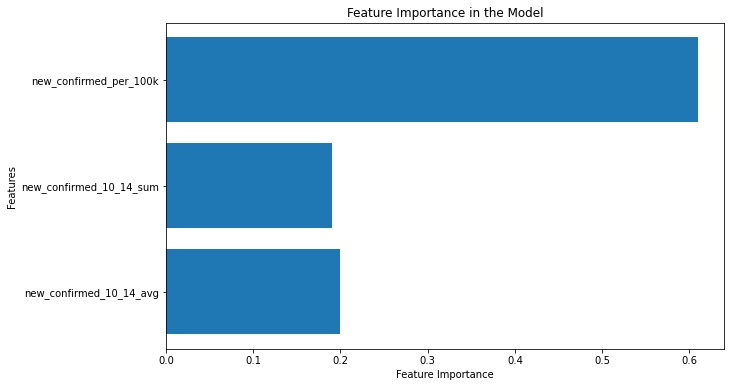

In [279]:
# Extracting and displaying the importance of each feature in the model
feature_importances = rf.feature_importances_
features = ['new_confirmed_10_14_avg', 'new_confirmed_10_14_sum', 'new_confirmed_per_100k']

for feature, importance in zip(features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

In [281]:
print(df[['subregion1_name', 'population']].drop_duplicates().head(50))


             subregion1_name  population
0                       None   331002647
1                    Arizona     7151502
2                    Arizona       71545
3                    Arizona      124864
4                    Arizona       53578
5                    Arizona      109079
6                    Arizona      431564
7                    Arizona      228082
8                    Arizona      209507
9                Connecticut     3605944
10               Connecticut      857748
11                    Hawaii       71827
12                    Hawaii      166146
13             Massachusetts       11205
14             New Hampshire       43027
15            Virgin Islands        4170
16                   Vermont       35675
17                   Vermont        6975
18                   Vermont       59006
19            American Samoa       49710
20                   Arizona      141001
21                   Arizona       37481
22                   Arizona        9443
23              

In [282]:
# Grouping data by location_key and checking for inconsistencies in population values
population_check = df.groupby('location_key')['population'].nunique()

# Identifying any location_key with more than one unique population value
print(population_check[population_check > 1])

Series([], Name: population, dtype: int64)
